# SIMULATION OF PARAMETER RANGES FOR TEMPORAL SIER2 MODEL WITH SEASONAL FORCING 

The idea of this script is to run some simulations to assess what would happen if we would: 
1) fix the incubation and infectious period variables according to the values found in literature, with always the same initial conditions.
2) sample these parameter values from a uniform distribution 

The birth and death rates used in this file were taken from the "ANUARIO ESTADISTICO DE SALUD 2021_provincia CFGOS. 
    The average birth- and death-rate was calculated from the years 2012 - 2020. 2021 was not used yet because this year wasn't final by the time the statistical report was created.

Check the Obisian files on "Incubation & infectious period temporal model", "Beta parameter temporal model"  and the meeting notes from "2024-10-10 Update + Jan" for more info. 

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random # for the draw function from uniform distribution

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
################
## Load model ##
################

from DENV_models_pySODM import JumpProcess_SEIR2_SeasonalForcing_BirthDeath as temporal_SEIR2

In [3]:
################################################
# calculating average birth and death rates
################################################

#The birth rates are given as births per 1,000 population: 
birth_rates_2012_2020 = [10.7, 10.9, 10.6, 10.7, 10.4, 10.0, 10.0, 9.1, 8.7] # this is per year
average_birth_per_1000 = sum(birth_rates_2012_2020)/len(birth_rates_2012_2020)
print("average_birth_per_1000", average_birth_per_1000) # 9.93

average_birth_per_capita = average_birth_per_1000/1000
print("average_birth_per_capita", average_birth_per_capita)
average_birth_per_day = average_birth_per_capita/365
print("average_per_day", average_birth_per_day)

# the death rates are also given as deaths per 1,000: 
death_rates_2012_2020 = [7.9, 8.4, 8.7, 9.0, 8.7, 9.4, 9.1, 9.4, 9.8]
averate_death_per_1000 = sum(death_rates_2012_2020)/len(death_rates_2012_2020)
print("averate_death_per_1000", averate_death_per_1000) # 9.93

average_death_per_capita = averate_death_per_1000/1000
print("average_birth_per_capita", average_death_per_capita)
average_death_per_day = average_death_per_capita/365
print("average_death_per_day", average_death_per_day)

# THEY ARE VERY VERY SIMILAR! birth = 2.77e-05 and death = 2.45e-05 # births are slightly > deaths -> strange for their population. We might need to include migration...

average_birth_per_1000 10.122222222222222
average_birth_per_capita 0.010122222222222222
average_per_day 2.7732115677321154e-05
averate_death_per_1000 8.933333333333334
average_birth_per_capita 0.008933333333333333
average_death_per_day 2.447488584474886e-05


## 1. Model with fixed parameter values: 
- $\beta_0$ = 0.3
- $\beta_1$ = 0.5
- $\sigma$ incubation period = 6 days
- $\gamma$ recovery period = 7 days


In [6]:
#################
## Setup model ##
#################

# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.3, 'beta_1' : 0.5, 'ph': p} 

# omega = 2*np.pi sets the seasonality to yearly 
# ph = 0 sets the phase shift to zero, so a "normal" sin wave with a peak at 3 months

# Define initial condition
initN = 200000
initI1 = 20
initI2 = 20
initS = initN - (initI1 + initI2)

initial_states = {'S': initS,
               'I1': initI1,
               'I2': initI2}

In [30]:
####################
# Initialize model #
####################

model_temp = temporal_SEIR2(initial_states=initial_states, parameters=params) 

In [31]:
######################
# simulate the model # 
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations - 1 second per repetition ...
out_temp = model_temp.sim(time=5*365, N =n ,tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)


<xarray.Dataset> Size: 2MB
Dimensions:  (draws: 10, time: 1826)
Coordinates:
  * time     (time) int64 15kB 0 1 2 3 4 5 6 ... 1820 1821 1822 1823 1824 1825
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 146kB 2e+05 2e+05 ... 5.439e+03 5.439e+03
    S1       (draws, time) float64 146kB 0.0 0.0 0.0 ... 9.264e+04 9.263e+04
    S2       (draws, time) float64 146kB 0.0 0.0 0.0 ... 7.948e+04 7.948e+04
    E1       (draws, time) float64 146kB 0.0 1.0 5.0 3.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 146kB 0.0 5.0 8.0 13.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 146kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 146kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 146kB 0.0 2.0 6.0 8.0 ... 9.0 9.0 9.0 9.0
    R2       (draws, time) float64 146kB 0.0 2.0 3.0 5.0 7.0 ... 8.0 8.0 7.0 7.0
    R        (draws, time) float64 146kB 0.0 0.0 0.0 ... 1

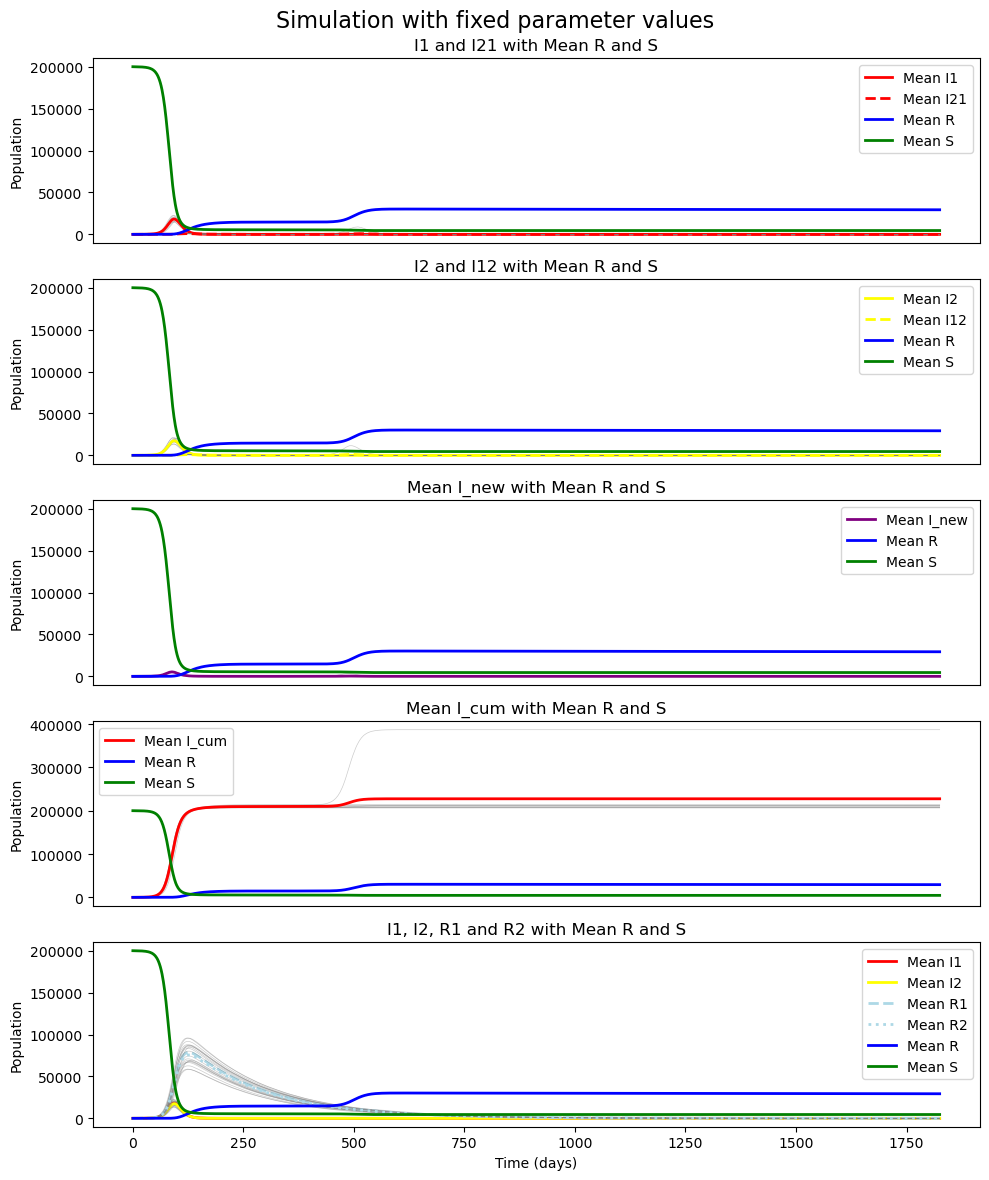

In [ ]:
# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(5, figsize=(10, 12))

###################################################
# Function to plot mean and individual draws
###################################################
def plot_variable(ax, data, color, label, linestyle='-', plot_draws=True, log=False):
    mean_data = data.mean(dim='draws')
    
    if log:
        # Apply log transformation
        mean_data = np.log(mean_data)
    
    # Plot individual simulations if plot_draws is True
    if plot_draws:
        for draw in data['draws']:
            draw_data = data.sel(draws=draw)
            if log:
                draw_data = np.log(draw_data)
            ax.plot(data['time'], draw_data, color=color, alpha=0.4, linewidth=0.5)
    
    # Plot the mean
    ax.plot(data['time'], mean_data, color=color, linestyle=linestyle, linewidth=2, label=label)


#######################################################
# Plot the two serotype subplots for I1/I21 and I2/I12
#######################################################
for i, (firstI, secondI) in enumerate(variables_to_plot):
    plot_variable(axs[i], out_temp[firstI], colors[i], f'Mean {firstI}', log=False)
    plot_variable(axs[i], out_temp[secondI], colors[i], f'Mean {secondI}', linestyle='--', log=False)
    
    # Plot R and S in the first two subplots
    for j, mean_var in enumerate(mean_variables):
        plot_variable(axs[i], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
    
    axs[i].set_title(f'{firstI} and {secondI} with Mean R and S')


######################################
# Third subplot for I_new, R, and S
######################################

plot_variable(axs[2], out_temp["I_new"], 'purple', 'Mean I_new', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[2], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[2].set_title('Mean I_new with Mean R and S')

######################################
# Fourth subplot for I_new, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[3], out_temp["I_cum"], 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[3], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[3].set_title('Mean I_cum with Mean R and S')


######################################
# Fifth subplot for R1, R2, R
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[4], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[4], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[4], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[4], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[4], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[4].set_title('I1, I2, R1 and R2 with Mean R and S')
axs[4].set_xlabel('Time (days)')
axs[4].set_ylabel('Population')
axs[4].legend()

fig.suptitle(r'Simulation with fixed parameter values', fontsize=16)

for i, ax in enumerate(axs):
    if i < 4: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [34]:
print(str(out_temp[firstI]))

<xarray.DataArray 'I2' (draws: 10, time: 1826)> Size: 146kB
array([[20., 18., 18., ...,  0.,  0.,  0.],
       [20., 18., 17., ...,  0.,  0.,  0.],
       [20., 17., 15., ...,  0.,  0.,  0.],
       ...,
       [20., 17., 15., ...,  0.,  0.,  0.],
       [20., 18., 18., ...,  0.,  0.,  0.],
       [20., 19., 17., ...,  0.,  0.,  0.]])
Coordinates:
  * time     (time) int64 15kB 0 1 2 3 4 5 6 ... 1820 1821 1822 1823 1824 1825
Dimensions without coordinates: draws


It seems like there is only one infection happening. 
Let's have a look at how many people are in R and I1 or I2 by the end of the first year. 

The following shows that there are no individuals left in the infectious compartment to jumpstart a second epidemic after the first year. 

In [13]:
print("I1", out_temp["I1"].sel(time=365).values)
print("I2", out_temp["I2"].sel(time=365).values)
print("R", out_temp["R"].sel(time=365).values)


I1 [6. 1. 1. 0. 2. 0. 0. 0. 0. 0.]
I2 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
R [16953. 14619. 14686. 14429. 15707. 14704. 14376. 14914. 14917. 14557.]


## 2. Model with parameter sampling from uniform distribution
- $\beta_0$ = 0.3 (same as before)
- $\beta_1$ = 0.5 (same as before)
- $\sigma$ incubation period host: Uniform in [4,7] 
- $\gamma$ recovery period: Uniform in [4,10]

For this I use the draw_function from pySODM. The info for the draw_function is found in both the pySODM tutorial for enzyme kinetics and the source code at: https://github.com/twallema/pySODM/blob/master/tutorials/SIR_SI/calibration.py in the part on Results: Goodness-of-fit

In [39]:
#################
## Setup model ##
#################

# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.3, 'beta_1' : 0.5, 'ph': p} 

# DO I STILL NEED TO SET VALUES FOR GAMMA AND SIGMA IF I WILL ALSO DRAW FROM A DISTRIBUTION? 
# I THINK SO, I THINK YOU NEED A VALUE FOR ALL PARAMETERS IN ORDER TO SET UP THE MODEL AND THEN YOU ADJUST THE PARAMETER VALUES DURING THE MODEL.SIM 

# Define initial condition
initN = 200000
initI1 = 20
initI2 = 20
initS = initN - (initI1 + initI2)

init_states = {'S': initS,
               'I1': initI1,
               'I2': initI2}

#define the draw_function to be used in the model simulation: 
def draw_fcn(parameters, samples): 
    parameters['gamma'] = np.random.uniform(samples['gamma'][0], samples['gamma'][1]) # sample from uniform distribution with bounds given in the samples dictionary
    parameters['sigma'] = np.random.uniform(samples['sigma'][0], samples['sigma'][1]) 
    # Print or log the drawn values for verification
    print(f"Drawn gamma: {parameters['gamma']}, Drawn sigma: {parameters['sigma']}") # I added this to make sure that the parameters were in fact being sampled 

    return parameters

# create the samples dictionary for the parameter values 
samples_dict = {
    'sigma': [4, 7], # distribution bounds for sigma
    'gamma': [4, 10] # distribution bounds for gamma
}

In [40]:
####################
# Initialize model #
####################

model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

In [ ]:
######################
# simulate the model # with uniform distr for sigma and gamma
######################
tau = 1.0
n = 100   # Repeated simulations used in visualisations 
out_temp = model_temp.sim(time=5*365, N =n , draw_function=draw_fcn, draw_function_kwargs={'samples': samples_dict}, tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)

Drawn gamma: 9.02116736261374, Drawn sigma: 4.783571067547771
Drawn gamma: 9.966846992700251, Drawn sigma: 6.099714854365061
Drawn gamma: 7.7280000904479556, Drawn sigma: 4.541383312355421
Drawn gamma: 5.636820061636309, Drawn sigma: 6.816037915585593
Drawn gamma: 4.213986417636379, Drawn sigma: 4.2170645661843125
Drawn gamma: 7.315375350733782, Drawn sigma: 4.211104361293055
Drawn gamma: 6.925954149556221, Drawn sigma: 5.019811841689749
Drawn gamma: 4.388894772295597, Drawn sigma: 6.785607441329491
Drawn gamma: 9.076287554970214, Drawn sigma: 6.453111474118037
Drawn gamma: 7.900921841448632, Drawn sigma: 4.0754495566903115
Drawn gamma: 6.440879369875229, Drawn sigma: 6.64381390337617
Drawn gamma: 7.7217142791589595, Drawn sigma: 4.759037956584512
Drawn gamma: 4.388329986649799, Drawn sigma: 6.6618206702797576
Drawn gamma: 4.4492003932171285, Drawn sigma: 6.806299994926151
Drawn gamma: 7.928709073594055, Drawn sigma: 5.808728679006595
Drawn gamma: 9.945641135528868, Drawn sigma: 5.7944

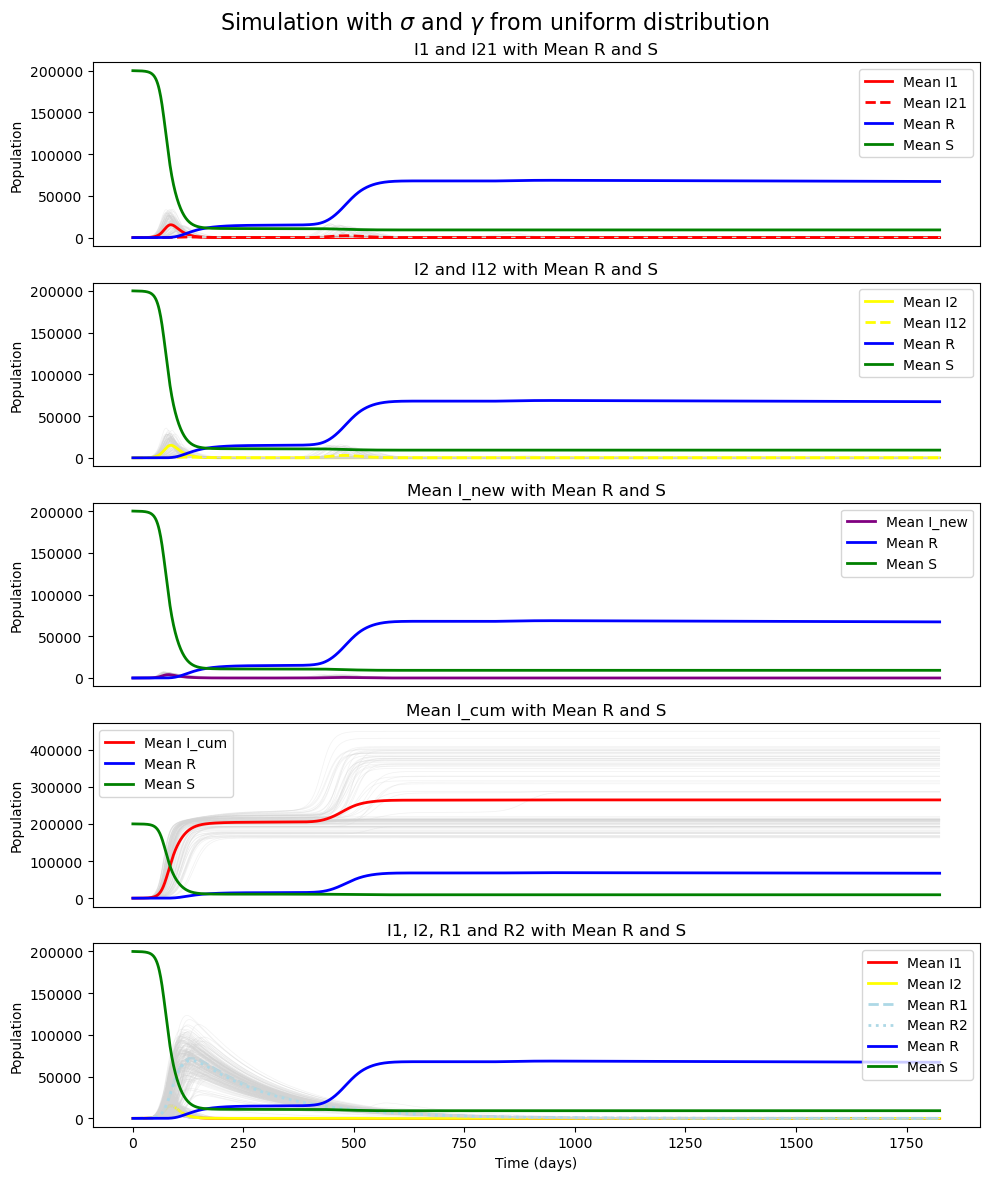

In [ ]:
# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(5, figsize=(10, 12))

###################################################
# Function to plot mean and individual draws
###################################################
def plot_variable(ax, data, color, label, linestyle='-', plot_draws=True, log=False):
    mean_data = data.mean(dim='draws')
    
    if log:
        # Apply log transformation
        mean_data = np.log(mean_data)
    
    # Plot individual simulations if plot_draws is True
    if plot_draws:
        for draw in data['draws']:
            draw_data = data.sel(draws=draw)
            if log:
                draw_data = np.log(draw_data)
            ax.plot(data['time'], draw_data, color=color, alpha=0.4, linewidth=0.5)
    
    # Plot the mean
    ax.plot(data['time'], mean_data, color=color, linestyle=linestyle, linewidth=2, label=label)


#######################################################
# Plot the two serotype subplots for I1/I21 and I2/I12
#######################################################
for i, (firstI, secondI) in enumerate(variables_to_plot):
    plot_variable(axs[i], out_temp[firstI], colors[i], f'Mean {firstI}', log=False)
    plot_variable(axs[i], out_temp[secondI], colors[i], f'Mean {secondI}', linestyle='--', log=False)
    
    # Plot R and S in the first two subplots
    for j, mean_var in enumerate(mean_variables):
        plot_variable(axs[i], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
    
    axs[i].set_title(f'{firstI} and {secondI} with Mean R and S')
    axs[i].set_ylabel('Population')
    axs[i].legend()


######################################
# Third subplot for I_new, R, and S
######################################

plot_variable(axs[2], I_new, 'purple', 'Mean I_new', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[2], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[2].set_title('Mean I_new with Mean R and S')


######################################
# Fourth subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[3], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[3], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[3].set_title('Mean I_cum with Mean R and S')


######################################
# Fifth subplot for R1, R2, R
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[4], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[4], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[4], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[4], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[4], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[4].set_title('I1, I2, R1 and R2 with Mean R and S')
axs[4].set_xlabel('Time (days)')
axs[4].set_ylabel('Population')
axs[4].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\sigma$ and $\gamma$ from uniform distribution', fontsize=16)

for i, ax in enumerate(axs):
    if i < 4: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Now I additionally add a uniform prior for $\beta_0$
The distribution taken here is originating from the ten Bosch et al. (2016) publication: 
$U[0.27 - 1.10]$


In [45]:
#################
## Setup model ##
#################

# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.3, 'beta_1' : 0.5, 'ph': p} 

# DO I STILL NEED TO SET VALUES FOR GAMMA AND SIGMA IF I WILL ALSO DRAW FROM A DISTRIBUTION? 
# I THINK SO, I THINK YOU NEED A VALUE FOR ALL PARAMETERS IN ORDER TO SET UP THE MODEL AND THEN YOU ADJUST THE PARAMETER VALUES DURING THE MODEL.SIM 

# Define initial condition
initN = 200000
initI1 = 20
initI2 = 20
initS = initN - (initI1 + initI2)

init_states = {'S': initS,
               'I1': initI1,
               'I2': initI2}

#define the draw_function to be used in the model simulation: 
def draw_fcn(parameters, samples): 
    parameters['beta_0'] = np.random.uniform(samples['beta_0'][0], samples['beta_0'][1]) 
    parameters['gamma'] = np.random.uniform(samples['gamma'][0], samples['gamma'][1]) # sample from uniform distribution with bounds given in the samples dictionary
    parameters['sigma'] = np.random.uniform(samples['sigma'][0], samples['sigma'][1]) 

    return parameters

# create the samples dictionary for the parameter values 
samples_dict = {
    'beta_0' : [0.27, 1.10],
    'sigma': [4, 7], # distribution bounds for sigma
    'gamma': [4, 10] # distribution bounds for gamma
}

In [46]:
######################
# simulate the model # with uniform distr for sigma and gamma
######################
tau = 1.0
n = 100   # Repeated simulations used in visualisations 
out_temp = model_temp.sim(time=5*365, N =n , draw_function=draw_fcn, draw_function_kwargs={'samples': samples_dict}, tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)

<xarray.Dataset> Size: 23MB
Dimensions:  (draws: 100, time: 1826)
Coordinates:
  * time     (time) int64 15kB 0 1 2 3 4 5 6 ... 1820 1821 1822 1823 1824 1825
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 1MB 2e+05 1.999e+05 1.999e+05 ... 0.0 0.0 0.0
    S1       (draws, time) float64 1MB 0.0 0.0 0.0 ... 1.546e+04 1.546e+04
    S2       (draws, time) float64 1MB 0.0 0.0 0.0 ... 1.675e+04 1.675e+04
    E1       (draws, time) float64 1MB 0.0 11.0 12.0 24.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 1MB 0.0 7.0 16.0 20.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 1MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 1MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 1MB 0.0 3.0 3.0 5.0 6.0 ... 5.0 5.0 5.0 5.0
    R2       (draws, time) float64 1MB 0.0 4.0 4.0 6.0 6.0 ... 3.0 3.0 3.0 3.0
    R        (draws, time) float64 1MB 0.0 0.0 0.0 ... 1.593

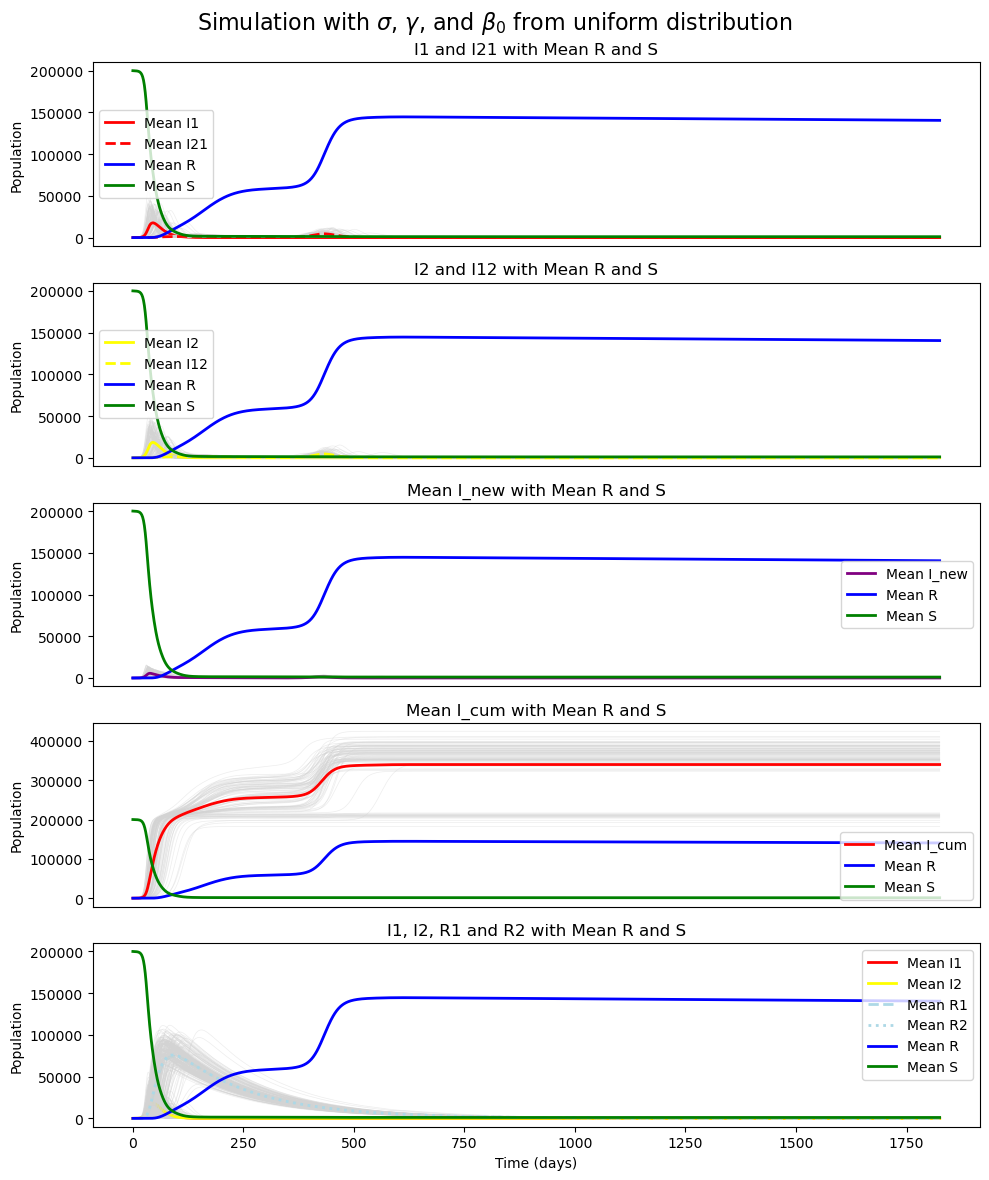

In [48]:
# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(5, figsize=(10, 12))

###################################################
# Function to plot mean and individual draws
###################################################
def plot_variable(ax, data, color, label, linestyle='-', plot_draws=True, log=False):
    mean_data = data.mean(dim='draws')
    
    if log:
        # Apply log transformation
        mean_data = np.log(mean_data)
    
    # Plot individual simulations if plot_draws is True
    if plot_draws:
        for draw in data['draws']:
            draw_data = data.sel(draws=draw)
            if log:
                draw_data = np.log(draw_data)
            ax.plot(data['time'], draw_data, color='lightgray', alpha=0.4, linewidth=0.5)
    
    # Plot the mean
    ax.plot(data['time'], mean_data, color=color, linestyle=linestyle, linewidth=2, label=label)


#######################################################
# Plot the two serotype subplots for I1/I21 and I2/I12
#######################################################
for i, (firstI, secondI) in enumerate(variables_to_plot):
    plot_variable(axs[i], out_temp[firstI], colors[i], f'Mean {firstI}', log=False)
    plot_variable(axs[i], out_temp[secondI], colors[i], f'Mean {secondI}', linestyle='--', log=False)
    
    # Plot R and S in the first two subplots
    for j, mean_var in enumerate(mean_variables):
        plot_variable(axs[i], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
    
    axs[i].set_title(f'{firstI} and {secondI} with Mean R and S')
    axs[i].set_ylabel('Population')
    axs[i].legend()


######################################
# Third subplot for I_new, R, and S
######################################

plot_variable(axs[2], I_new, 'purple', 'Mean I_new', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[2], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[2].set_title('Mean I_new with Mean R and S')


######################################
# Fourth subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[3], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[3], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[3].set_title('Mean I_cum with Mean R and S')


######################################
# Fifth subplot for R1, R2, R
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[4], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[4], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[4], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[4], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[4], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[4].set_title('I1, I2, R1 and R2 with Mean R and S')
axs[4].set_xlabel('Time (days)')
axs[4].set_ylabel('Population')
axs[4].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\sigma$, $\gamma$, and $\beta_0$ from uniform distribution', fontsize=16)

for i, ax in enumerate(axs):
    if i < 4: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Altering $\beta_0$ to get repeated waves

The $\beta_0$ is still much too large in our model. It's causing all the susceptibles to become infected within the first epidemic.  
I will gradually reduce the $\beta_0$ value to see if I can find a range in which we have waves. 

- $\beta_0$ = 0.01 - 0.3 with draw function
- $\beta_1$ = 0.5
- $\sigma$ incubation period = 6 days
- $\gamma$ recovery period = 7 days
- seeding equally between I1 and I2

In [ ]:
#################
## Setup model ##
#################

# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.01, 'beta_1' : 0.5, 'ph': p} 

# omega = 2*np.pi sets the seasonality to yearly 
# ph = 0 sets the phase shift to zero, so a "normal" sin wave with a peak at 3 months

# Define initial condition
initN = 200000
initI1 = 20
initI2 = 20
initS = initN - (initI1 + initI2)


init_states = {'S': initS,
               'I1': initI1,
               'I2': initI2}


#define the draw_function to be used in the model simulation: 
def draw_fcn(parameters, samples): 
    parameters['beta_0'] = np.random.uniform(samples['beta_0'][0], samples['beta_0'][1]) 

    return parameters

# create the samples dictionary for the parameter values 
samples_dict = {
    'beta_0' : [0.01, 0.3],
}

In [ ]:
####################
# Initialize model #
####################

model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

In [ ]:
######################
# simulate the model # with uniform distr for sigma and gamma
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations 
out_temp = model_temp.sim(time=10*365, N =n , draw_function=draw_fcn, draw_function_kwargs={'samples': samples_dict}, tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)
print(out_temp.data_vars) # print the variables
print(out_temp.dims) # print the dimensions and sizes
print(out_temp.coords) # print the coordinates
print(out_temp.info()) # print overview including variables, dimensions, data types and attributes



<xarray.Dataset> Size: 5MB
Dimensions:  (draws: 10, time: 3651)
Coordinates:
  * time     (time) int64 29kB 0 1 2 3 4 5 6 ... 3645 3646 3647 3648 3649 3650
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 292kB 2e+05 2e+05 2e+05 ... 1.59e+05 1.59e+05
    S1       (draws, time) float64 292kB 0.0 0.0 0.0 ... 2.756e+04 2.756e+04
    S2       (draws, time) float64 292kB 0.0 0.0 0.0 ... 1.106e+04 1.106e+04
    E1       (draws, time) float64 292kB 0.0 0.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 292kB 0.0 1.0 1.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 292kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 292kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 292kB 0.0 1.0 5.0 7.0 ... 0.0 0.0 0.0 0.0
    R2       (draws, time) float64 292kB 0.0 2.0 7.0 10.0 ... 0.0 0.0 0.0 0.0
    R        (draws, time) float64 292kB 0.0 0.0 0

In [ ]:
print(out_temp.data_vars) # print the variables
print(out_temp.dims) # print the dimensions and sizes
print(out_temp.coords) # print the coordinates
print(out_temp.info()) # print overview including variables, dimensions, data types and attributes

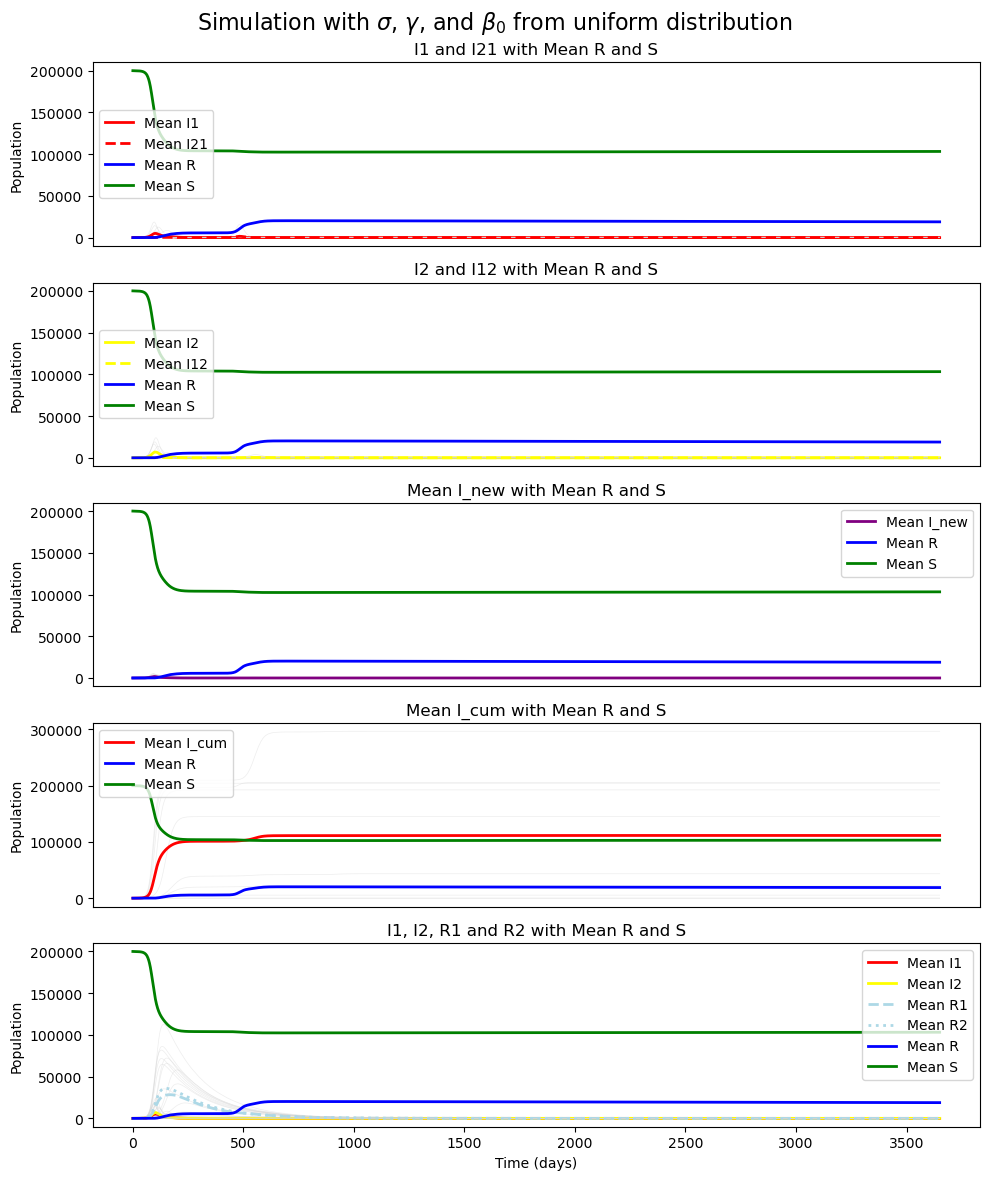

In [12]:
##########################################
# PLOT THE RESULTS FOR BETA_0 0.01 - 0.30
##########################################

# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(5, figsize=(10, 12))

###################################################
# Function to plot mean and individual draws
###################################################
def plot_variable(ax, data, color, label, linestyle='-', plot_draws=True, log=False):
    mean_data = data.mean(dim='draws')
    
    if log:
        # Apply log transformation
        mean_data = np.log(mean_data)
    
    # Plot individual simulations if plot_draws is True
    if plot_draws:
        for draw in data['draws']:
            draw_data = data.sel(draws=draw)
            if log:
                draw_data = np.log(draw_data)
            ax.plot(data['time'], draw_data, color='lightgray', alpha=0.4, linewidth=0.5)
    
    # Plot the mean
    ax.plot(data['time'], mean_data, color=color, linestyle=linestyle, linewidth=2, label=label)


#######################################################
# Plot the two serotype subplots for I1/I21 and I2/I12
#######################################################
for i, (firstI, secondI) in enumerate(variables_to_plot):
    plot_variable(axs[i], out_temp[firstI], colors[i], f'Mean {firstI}', log=False)
    plot_variable(axs[i], out_temp[secondI], colors[i], f'Mean {secondI}', linestyle='--', log=False)
    
    # Plot R and S in the first two subplots
    for j, mean_var in enumerate(mean_variables):
        plot_variable(axs[i], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
    
    axs[i].set_title(f'{firstI} and {secondI} with Mean R and S')
    axs[i].set_ylabel('Population')
    axs[i].legend()


######################################
# Third subplot for I_new, R, and S
######################################

plot_variable(axs[2], I_new, 'purple', 'Mean I_new', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[2], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[2].set_title('Mean I_new with Mean R and S')


######################################
# Fourth subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[3], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[3], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[3].set_title('Mean I_cum with Mean R and S')


######################################
# Fifth subplot for R1, R2, R
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[4], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[4], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[4], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[4], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[4], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[4].set_title('I1, I2, R1 and R2 with Mean R and S')
axs[4].set_xlabel('Time (days)')
axs[4].set_ylabel('Population')
axs[4].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\sigma$, $\gamma$, and $\beta_0$ from uniform distribution', fontsize=16)

for i, ax in enumerate(axs):
    if i < 4: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

With the draw_func I can't see which draw within my plot is coming from which $\beta_0$ value.  
So, I will use fixes values and plot them one by one to investigate. 

- $\beta_0$ = 0.01
- $\beta_1$ = 0.5

- seeding equally between I1 and I2

In [21]:
#################
## Setup model ##
#################

# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.01, 'beta_1' : 0.5, 'ph': p} 

# omega = 2*np.pi sets the seasonality to yearly 
# ph = 0 sets the phase shift to zero, so a "normal" sin wave with a peak at 3 months

# Define initial condition
initN = 200000
initI1 = 20
initI2 = 10
initS = initN - (initI1 + initI2)

init_states = {'S': initS,
               'I1': initI1,
               'I2': initI2}

####################
# Initialize model #
####################

model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

######################
# simulate the model # 
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations - 1 second per repetition ...
out_temp = model_temp.sim(time=3*365, N =n ,tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)


<xarray.Dataset> Size: 1MB
Dimensions:  (draws: 10, time: 1096)
Coordinates:
  * time     (time) int64 9kB 0 1 2 3 4 5 6 ... 1090 1091 1092 1093 1094 1095
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 88kB 2e+05 2e+05 ... 2.005e+05 2.005e+05
    S1       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 ... 23.0 23.0 23.0 23.0
    S2       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 ... 12.0 12.0 12.0 12.0
    E1       (draws, time) float64 88kB 0.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 88kB 0.0 2.0 6.0 7.0 10.0 ... 0.0 0.0 0.0 0.0
    R2       (draws, time) float64 88kB 0.0 0.0 2.0 2.0 3.0 ... 0.0 0.0 0.0 0.0
    R        (draws, time) float64 88kB 0.0 0.0 

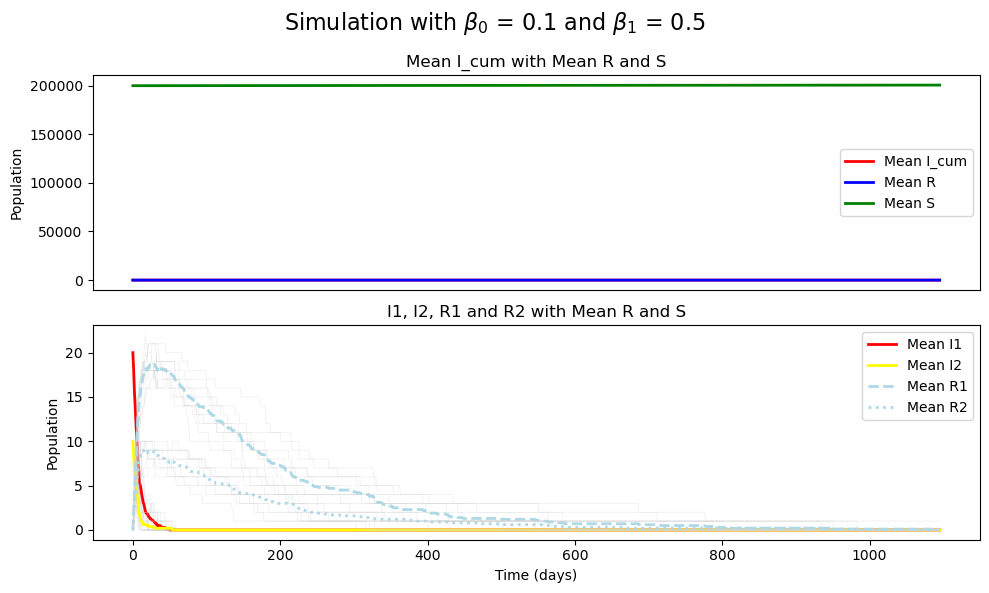

In [ ]:
##########################################
# PLOT THE RESULTS FOR BETA_0 0.01 & beta_1 0.5
##########################################

# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(2, figsize=(10, 6))


######################################
# First subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[0], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[0], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[0].set_title('Mean I_cum with Mean R and S')


######################################
# Fifth subplot for I1, I2, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[1], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[1], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[1], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[1], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

axs[1].set_title('I1, I2, R1 and R2')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Population')
axs[1].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\beta_0$ = 0.1 and $\beta_1$ = 0.5', fontsize=16)

for i, ax in enumerate(axs):
    if i < 1: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

This results in no epidemic at all. 

Next attempt:
- $\beta_0$ = 0.05
- $\beta_1$ = 0.5

In [23]:
#################
## Setup model ##
#################

# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.05, 'beta_1' : 0.5, 'ph': p} 


####################
# Initialize model #
####################

model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

######################
# simulate the model # 
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations - 1 second per repetition ...
out_temp = model_temp.sim(time=3*365, N =n ,tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)

<xarray.Dataset> Size: 1MB
Dimensions:  (draws: 10, time: 1096)
Coordinates:
  * time     (time) int64 9kB 0 1 2 3 4 5 6 ... 1090 1091 1092 1093 1094 1095
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 88kB 2e+05 2e+05 ... 2.005e+05 2.005e+05
    S1       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 ... 21.0 21.0 21.0 21.0
    S2       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 ... 19.0 19.0 19.0 19.0
    E1       (draws, time) float64 88kB 0.0 0.0 1.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 1.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 88kB 0.0 3.0 6.0 11.0 ... 0.0 0.0 0.0 0.0
    R2       (draws, time) float64 88kB 0.0 2.0 4.0 4.0 5.0 ... 0.0 0.0 0.0 0.0
    R        (draws, time) float64 88kB 0.0 0.0 0.0 

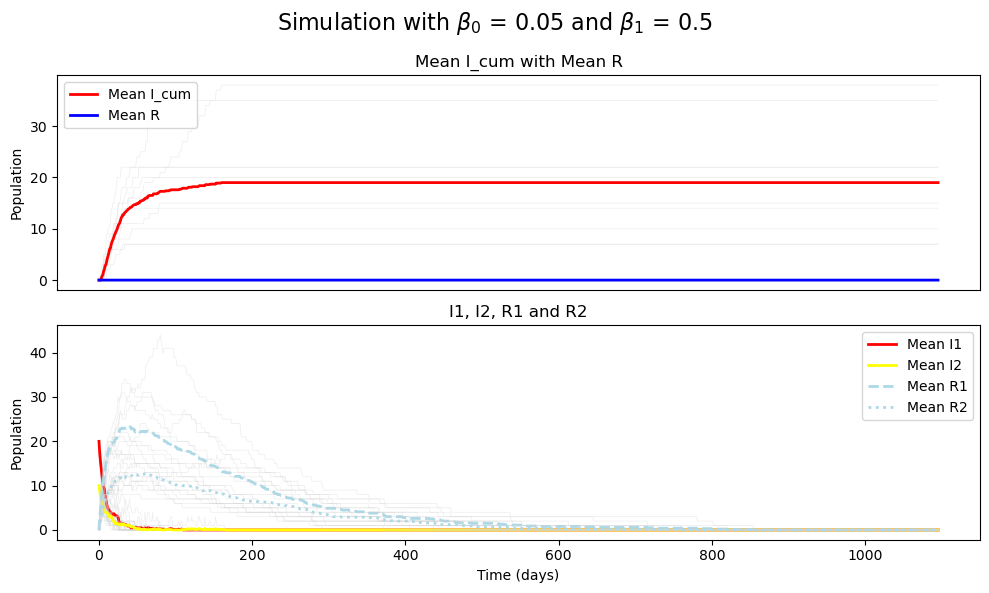

In [26]:
##########################################
# PLOT THE RESULTS FOR BETA_0 0.05 & beta_1 0.5
##########################################

# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(2, figsize=(10, 6))


######################################
# First subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[0], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[0], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[0].set_title('Mean I_cum with Mean R')


######################################
# Fifth subplot for I1, I2, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[1], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[1], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[1], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[1], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

axs[1].set_title('I1, I2, R1 and R2')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Population')
axs[1].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\beta_0$ = 0.05 and $\beta_1$ = 0.5', fontsize=16)

for i, ax in enumerate(axs):
    if i < 1: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

Here at least we get 1 single SMALL epidemic in some of the simulation, with max infected at one timepoint = 40 for I1. 

Next attempt: 
- $\beta_0$ = 0.1
- $\beta_1$ = 0.5

In [38]:
#################
## Setup model ## 'beta_0' : 0.1, 'beta_1' : 0.5
#################
# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.1, 'beta_1' : 0.5, 'ph': p} 

####################
# Initialize model #
####################
model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

######################
# simulate the model # 
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations - 1 second per repetition ...
out_temp = model_temp.sim(time=3*365, N =n ,tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)

<xarray.Dataset> Size: 1MB
Dimensions:  (draws: 10, time: 1096)
Coordinates:
  * time     (time) int64 9kB 0 1 2 3 4 5 6 ... 1090 1091 1092 1093 1094 1095
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 88kB 2e+05 2e+05 ... 2.005e+05 2.005e+05
    S1       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 ... 199.0 199.0 199.0
    S2       (draws, time) float64 88kB 0.0 0.0 0.0 0.0 ... 16.0 16.0 16.0 16.0
    E1       (draws, time) float64 88kB 0.0 4.0 5.0 7.0 7.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 88kB 0.0 1.0 1.0 3.0 3.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 88kB 0.0 8.0 9.0 12.0 ... 0.0 0.0 0.0 0.0
    R2       (draws, time) float64 88kB 0.0 2.0 2.0 3.0 3.0 ... 0.0 0.0 0.0 0.0
    R        (draws, time) float64 88kB 0.0 0.0 0.0 0.

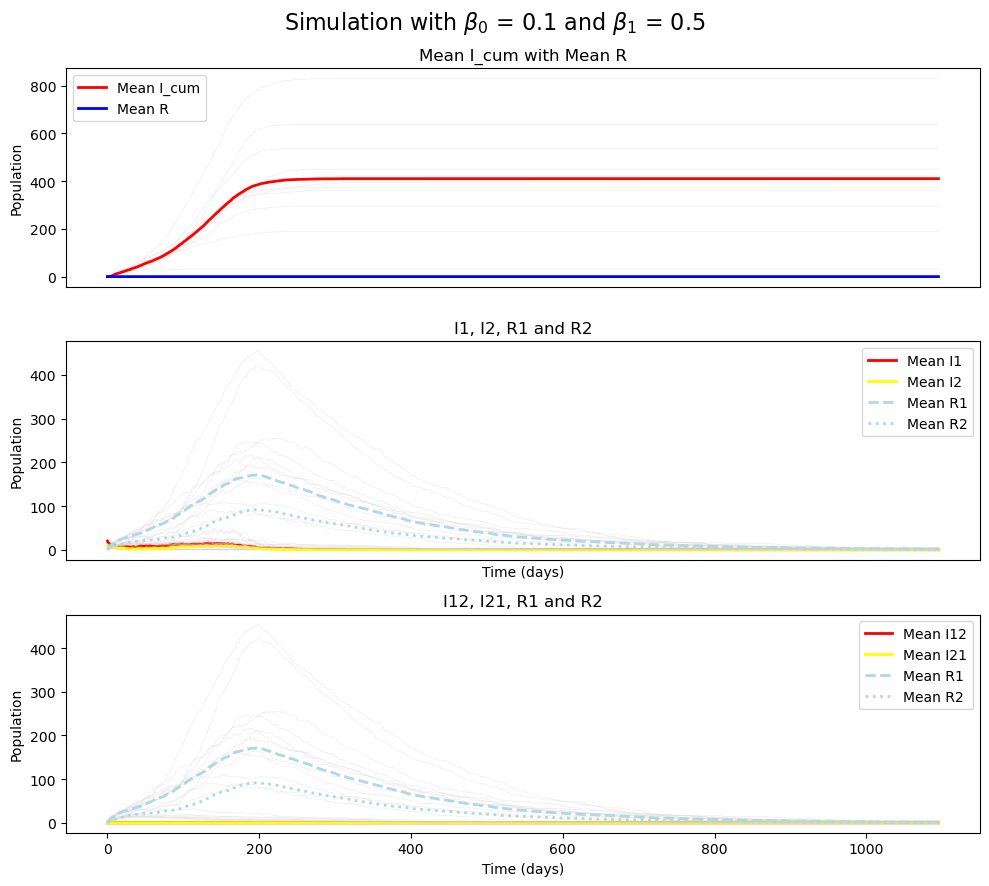

In [39]:
##########################################
# PLOT THE RESULTS FOR BETA_0 0.10 & beta_1 0.5
##########################################

# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(3, figsize=(10, 9))


######################################
# First subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[0], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[0], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[0].set_title('Mean I_cum with Mean R')


######################################
# second subplot for I1, I2, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[1], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[1], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[1], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[1], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

axs[1].set_title('I1, I2, R1 and R2')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Population')
axs[1].legend()

######################################
# third subplot for I12, I21, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[2], out_temp["I12"], "red", 'Mean I12', log=False)
plot_variable(axs[2], out_temp["I21"], "yellow", 'Mean I21', log=False)
plot_variable(axs[2], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[2], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

axs[2].set_title('I12, I21, R1 and R2')
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Population')
axs[2].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\beta_0$ = 0.1 and $\beta_1$ = 0.5', fontsize=16)

for i, ax in enumerate(axs):
    if i < 2: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

One larger epidemic at beginning NO SECONDARY INFECTION THOUGH. Because you can see that no one is actually going to R

Next attempt: 
- $\beta_0$ = 0.20
- $\beta_1$ = 0.5

In [34]:
#################
## Setup model ## 'beta_0' : 0.2, 'beta_1' : 0.5
#################
# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.2, 'beta_1' : 0.5, 'ph': p} 

####################
# Initialize model #
####################
model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

######################
# simulate the model # 
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations - 1 second per repetition ...
out_temp = model_temp.sim(time=3*365, N =n ,tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)

<xarray.Dataset> Size: 1MB
Dimensions:  (draws: 10, time: 1096)
Coordinates:
  * time     (time) int64 9kB 0 1 2 3 4 5 6 ... 1090 1091 1092 1093 1094 1095
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 88kB 2e+05 2e+05 2e+05 ... 4.5e+04 4.5e+04
    S1       (draws, time) float64 88kB 0.0 0.0 0.0 ... 8.877e+04 8.877e+04
    S2       (draws, time) float64 88kB 0.0 0.0 0.0 ... 5.599e+04 5.599e+04
    E1       (draws, time) float64 88kB 0.0 4.0 6.0 11.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 88kB 0.0 4.0 5.0 6.0 8.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 88kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 88kB 0.0 3.0 6.0 8.0 ... 549.0 546.0 544.0
    R2       (draws, time) float64 88kB 0.0 0.0 0.0 1.0 ... 359.0 359.0 358.0
    R        (draws, time) float64 88kB 0.0 0.0 0.0 ... 6.162e

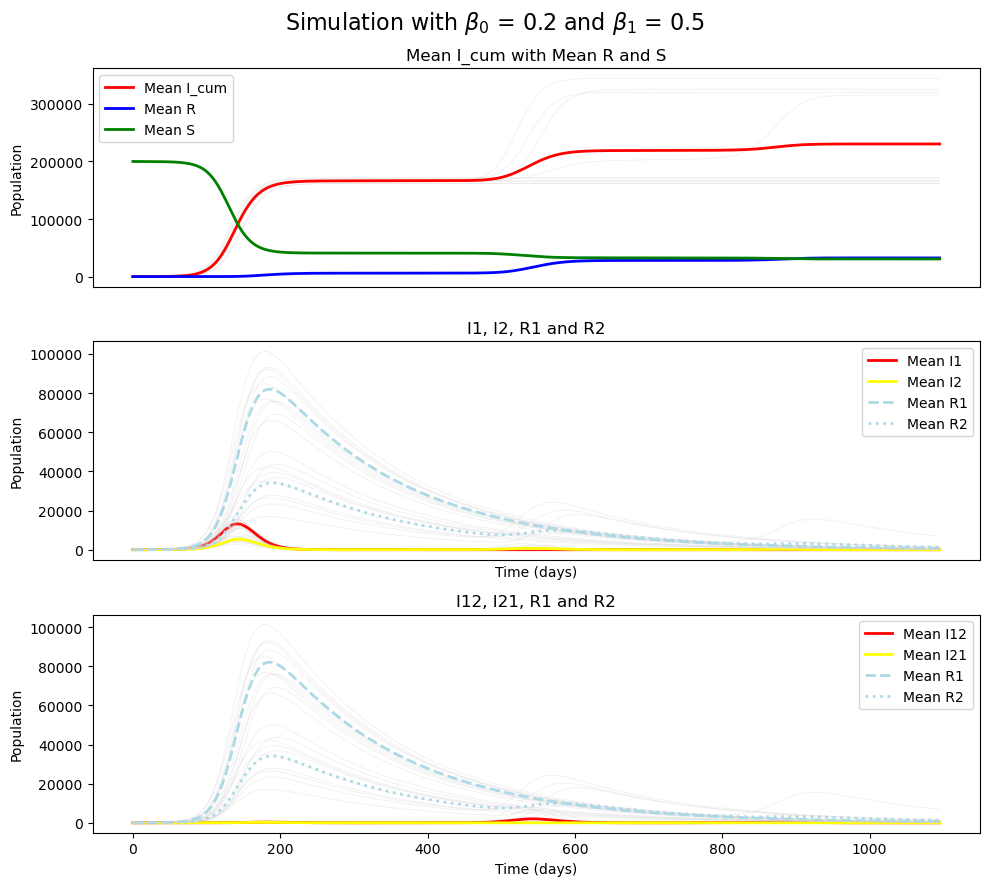

In [37]:
##########################################
# PLOT THE RESULTS FOR BETA_0 0.10 & beta_1 0.5
##########################################

# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(3, figsize=(10, 9))


######################################
# First subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[0], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[0], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[0].set_title('Mean I_cum with Mean R and S')


######################################
# second subplot for I1, I2, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[1], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[1], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[1], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[1], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

axs[1].set_title('I1, I2, R1 and R2')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Population')
axs[1].legend()

######################################
# third subplot for I12, I21, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[2], out_temp["I12"], "red", 'Mean I12', log=False)
plot_variable(axs[2], out_temp["I21"], "yellow", 'Mean I21', log=False)
plot_variable(axs[2], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[2], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)

axs[2].set_title('I12, I21, R1 and R2')
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Population')
axs[2].legend()


# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\beta_0$ = 0.2 and $\beta_1$ = 0.5', fontsize=16)

for i, ax in enumerate(axs):
    if i < 2: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()

Yes! This looks better!! WE HAVE WAVES. However, the problem here is that there are way too many people getting infected in the first, the total population is 200.000 large. So this means that by day 200, the entire population has already been infected, which is not likely. 

Next attempt:
- $\beta_0$ = 0.15
- $\beta_1$ = 0.5

In [46]:
#################
## Setup model ## 'beta_0' : 0.15, 'beta_1' : 0.5
#################
# Define model parameters
p = 0
params={'alpha':182.5, 'b':2.77e-05, 'd':2.45e-05, 'sigma':6, 'gamma':7,'omega':2*np.pi, 'psi': 1.5, 'beta_0' : 0.15, 'beta_1' : 0.5, 'ph': p} 

####################
# Initialize model #
####################
model_temp = temporal_SEIR2(initial_states=init_states, parameters=params) 

######################
# simulate the model # 
######################
tau = 1.0
n = 10   # Repeated simulations used in visualisations - 1 second per repetition ...
out_temp = model_temp.sim(time=8*365, N =n ,tau=tau, output_timestep=1)

#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out_temp)

<xarray.Dataset> Size: 4MB
Dimensions:  (draws: 10, time: 2921)
Coordinates:
  * time     (time) int64 23kB 0 1 2 3 4 5 6 ... 2915 2916 2917 2918 2919 2920
Dimensions without coordinates: draws
Data variables: (12/16)
    S        (draws, time) float64 234kB 2e+05 2e+05 ... 1.287e+05 1.287e+05
    S1       (draws, time) float64 234kB 0.0 0.0 0.0 ... 3.695e+04 3.695e+04
    S2       (draws, time) float64 234kB 0.0 0.0 0.0 ... 2.59e+04 2.59e+04
    E1       (draws, time) float64 234kB 0.0 5.0 6.0 8.0 ... 0.0 0.0 0.0 0.0
    E2       (draws, time) float64 234kB 0.0 0.0 1.0 3.0 3.0 ... 0.0 0.0 0.0 0.0
    E12      (draws, time) float64 234kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    I21      (draws, time) float64 234kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R1       (draws, time) float64 234kB 0.0 3.0 7.0 8.0 9.0 ... 5.0 5.0 5.0 5.0
    R2       (draws, time) float64 234kB 0.0 0.0 0.0 1.0 0.0 ... 0.0 0.0 0.0 0.0
    R        (draws, time) float64 234kB 0.0 0.0 0.0 

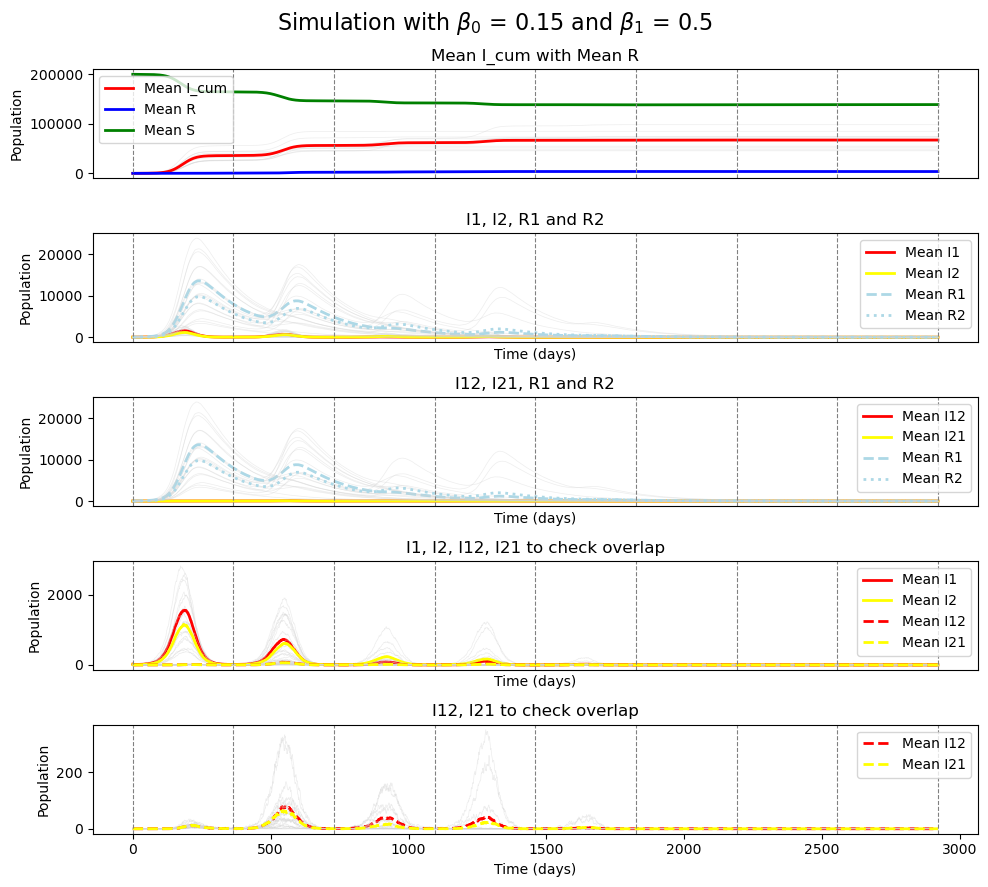

In [52]:
##########################################
# PLOT THE RESULTS FOR BETA_0 0.15 & beta_1 0.5
##########################################

# helper function to create vertical lines per year
def add_vertical_lines(ax, intervals, color='gray', linestyle='--', linewidth=0.8):
    """Add vertical lines to the given axes at the specified intervals."""
    for x in intervals:
        ax.axvline(x=x, color=color, linestyle=linestyle, linewidth=linewidth)

# Convert time to a NumPy array if needed
time_values = out_temp['time'].values

# Extract yearly intervals (assuming time is in days since the start)
vertical_line_positions = time_values[time_values % 365 == 0]  # Get multiples of 365


# Define the variables for each subplot and colors
variables_to_plot = [('I1', 'I21'), ('I2', 'I12')]  # Paired variables are to be plotted together
colors = ['red', 'yellow']  # Color for I1/I21 and I2/I12 respectively
mean_variables = ['R', 'S']
mean_colors = ['blue', 'green']

# Define cumulative and new infections variables
I_cum = out_temp['I_cum']
I_new = out_temp['I_new']

# Create a 4x1 subplot layout for the two serotype subplots plus I_new and I_cum
fig, axs = plt.subplots(5, figsize=(10, 9))


######################################
# First subplot for I_cum, R, and S
######################################plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[0], I_cum, 'red', 'Mean I_cum', log=False)
for j, mean_var in enumerate(mean_variables):
    plot_variable(axs[0], out_temp[mean_var], mean_colors[j], f'Mean {mean_var}', plot_draws=False, log=False)
axs[0].set_title('Mean I_cum with Mean R')
add_vertical_lines(axs[0], vertical_line_positions)


######################################
# second subplot for I1, I2, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[1], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[1], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[1], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[1], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)
add_vertical_lines(axs[1], vertical_line_positions)


axs[1].set_title('I1, I2, R1 and R2')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Population')
axs[1].legend()

######################################
# third subplot for I12, I21, R1, R2
###################################### plot_variable(axs[3], I_cum, 'brown', 'Mean I_cum')
plot_variable(axs[2], out_temp["I12"], "red", 'Mean I12', log=False)
plot_variable(axs[2], out_temp["I21"], "yellow", 'Mean I21', log=False)
plot_variable(axs[2], out_temp["R1"], "lightblue",linestyle='--', label ='Mean R1', log=False)
plot_variable(axs[2], out_temp["R2"], "lightblue",linestyle=':', label = 'Mean R2', log=False)
add_vertical_lines(axs[2], vertical_line_positions)


axs[2].set_title('I12, I21, R1 and R2')
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Population')
axs[2].legend()

######################################
# Fourth subplot for only I1, I2, I12, I21
###################################### 
plot_variable(axs[3], out_temp["I1"], "red", 'Mean I1', log=False)
plot_variable(axs[3], out_temp["I2"], "yellow", 'Mean I2', log=False)
plot_variable(axs[3], out_temp["I12"], "red",linestyle='--',  label ='Mean I12', log=False)
plot_variable(axs[3], out_temp["I21"], "yellow",linestyle='--',  label ='Mean I21', log=False)
add_vertical_lines(axs[3], vertical_line_positions)

axs[3].set_title('I1, I2, I12, I21 to check overlap')
axs[3].set_xlabel('Time (days)')
axs[3].set_ylabel('Population')
axs[3].legend()

######################################
# Fourth subplot for only I12, I21
###################################### 
plot_variable(axs[4], out_temp["I12"], "red",linestyle='--',  label ='Mean I12', log=False)
plot_variable(axs[4], out_temp["I21"], "yellow",linestyle='--',  label ='Mean I21', log=False)
add_vertical_lines(axs[4], vertical_line_positions)

axs[4].set_title('I12, I21 to check overlap')
axs[4].set_xlabel('Time (days)')
axs[4].set_ylabel('Population')
axs[4].legend()

# Add an overarching title for the entire figure
fig.suptitle(r'Simulation with $\beta_0$ = 0.15 and $\beta_1$ = 0.5', fontsize=16)

for i, ax in enumerate(axs):
    if i < 4: 
        ax.set_ylabel('Population')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()